In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras as keras
from keras.models import Sequential
from keras.layers import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from os import listdir
import math

Read every dataset in the folder

In [2]:
files = listdir('datasets')

datasets = []
datasets_train = []
datasets_test = []

def add_activity(name, df):
    if 'still' in name:
        df['activity'] = 'still'
    elif 'walking' in name:
        df['activity'] = 'walking'
    else:
        df['activity'] = 'running'
    return df

def split_data(df):
    num_rows = df.shape[0]
    num_test = math.floor(num_rows / 3)
    num_train = num_rows - num_test

    df_train = df.iloc[:num_train, :]
    df_test = df.iloc[num_train:, :]

    datasets_train.append(df_train)
    datasets_test.append(df_test)

    print(df_train.shape)
    print(df_test.shape)


for file in files:
    df = add_activity(file, pd.read_csv(f'datasets/{file}'))
    datasets.append(df)
    print("Dimensione dataset {} ".format(file), df.shape)

for df in datasets:
    split_data(df)

df_train = pd.concat(datasets_train, ignore_index=True)
df_test = pd.concat(datasets_test, ignore_index=True)

print("Dimensione merged dataset train ", df_train.shape)
print("Dimensione merged dataset test ", df_test.shape)



Dimensione dataset still_19_02_2023_17_28_18.csv  (521, 12)
Dimensione dataset walking_19_02_2023_17_10_11.csv  (546, 12)
Dimensione dataset walking_19_02_2023_17_16_37.csv  (705, 12)
Dimensione dataset walking_19_02_2023_17_19_05.csv  (654, 12)
Dimensione dataset walking_19_02_2023_17_21_28.csv  (790, 12)
Dimensione dataset walking_19_02_2023_17_24_19.csv  (829, 12)
Dimensione dataset walking_19_02_2023_17_26_26.csv  (712, 12)
(348, 12)
(173, 12)
(364, 12)
(182, 12)
(470, 12)
(235, 12)
(436, 12)
(218, 12)
(527, 12)
(263, 12)
(553, 12)
(276, 12)
(475, 12)
(237, 12)
Dimensione merged dataset train  (3173, 12)
Dimensione merged dataset test  (1584, 12)


Normalizzazione dei dati

,xa,ya,za,xg,yg,zg,xm,ym,zm,temp,hum,activity
0,0.595064,0.496636,0.383688,0.425706,0.467315,0.387846,0.509739,0.669910,0.265225,0.27056,0.454017,still
1,0.595064,0.496636,0.383688,0.425481,0.466763,0.388390,0.516661,0.662219,0.279581,0.27056,0.454017,still
2,0.595064,0.495600,0.384023,0.424017,0.467315,0.386752,0.513862,0.660643,0.291049,0.27056,0.454017,still
3,0.595064,0.496636,0.384693,0.425931,0.466947,0.388390,0.511101,0.661996,0.259684,0.27056,0.454017,still
4,0.594867,0.495859,0.383353,0.425706,0.467683,0.387846,0.524944,0.665610,0.259080,0.27056,0.454017,still
...,...,...,...,...,...,...,...,...,...,...,...,...
1579,0.516091,0.348602,0.484508,0.479103,0.803533,0.363584,0.581754,0.888018,0.439025,0.00000,0.443075,walking
1580,0.742547,0.362319,0.231117,0.324547,0.473759,0.198962,0.532358,0.761097,0.383280,0.00000,0.443075,walking
1581,0.641856,0.556936,0.361079,0.346289,0.426073,0.308529,0.549416,0.718098,0.363198,0.00000,0.443075,walking
1582,0.588351,0.591615,0.390889,0.663850,0.542993,0.416729,0.526798,0.775350,0.552781,0.00000,0.443075,walking


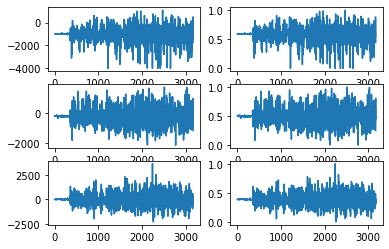

In [81]:
normalizer = MinMaxScaler()
num_columns = df_train.shape[1]

normalizer.fit(df_train.iloc[:, 0 : num_columns-1])

def normalize_df(df):
    
    norm_df = df.copy()
    norm_column = normalizer.transform(df.iloc[:, 0 : num_columns-1])
    norm_df.iloc[:, 0 : num_columns-1] = norm_column

    return norm_df

norm_train_df = normalize_df(df_train)
norm_test_df = normalize_df(df_test)


# fig, ((ax1, ax2),( ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)
# ax1.plot(np.arange(0, len(df_train.xa)), df_train.xa)
# ax3.plot(np.arange(0, len(df_train.ya)), df_train.ya)
# ax5.plot(np.arange(0, len(df_train.za)), df_train.za)

# ax2.plot(np.arange(0, len(norm_train_df.xa)), norm_train_df.xa)
# ax4.plot(np.arange(0, len(norm_train_df.ya)), norm_train_df.ya)
# ax6.plot(np.arange(0, len(norm_train_df.za)), norm_train_df.za)

# fig, ((ax1, ax2),( ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)
# ax1.plot(np.arange(0, len(df_test.xa)), df_test.xa)
# ax3.plot(np.arange(0, len(df_test.ya)), df_test.ya)
# ax5.plot(np.arange(0, len(df_test.za)), df_test.za)

# ax2.plot(np.arange(0, len(norm_test_df.xa)), norm_test_df.xa)
# ax4.plot(np.arange(0, len(norm_test_df.ya)), norm_test_df.ya)
# ax6.plot(np.arange(0, len(norm_test_df.za)), norm_test_df.za)

norm_test_df

Resize datasets

In [5]:
def reshape_data(df, time_steps, step):
    Xs = []
    ys = []

    num_cols = df.shape[1]

    X = df.iloc[:, :num_cols - 1]
    y = df.iloc[:, num_cols - 1:]

    print(X.shape)

    for i in range(0, len(X) - time_steps, step):
        values = X.iloc[i : (i+time_steps)].values
        labels = y.iloc[i : i + time_steps]
        Xs.append(values)
        ys.append(labels.mode()['activity'][0])
    
    return np.array(Xs), np.array(ys).reshape(-1, 1)


X_train , y_train = reshape_data(norm_train_df, 10, 10)
X_test , y_test = reshape_data(norm_test_df, 10, 10)


(3173, 11)
(1584, 11)


OneHotEncoder per la y

In [77]:
def encode_y(y):
    encoder = OneHotEncoder(sparse_output=False)

    encoded_y = encoder.fit_transform(y)
    return encoded_y

encoded_y_train = encode_y(y_train)
encoded_y_test = encode_y(y_test)

    

In [7]:
# stampa delle dimensioni

print(X_train.shape)
print(X_test.shape)

print(encoded_y_train.shape)
print(encoded_y_test.shape)
encoded_y_train

(317, 10, 11)
(158, 10, 11)
(317, 2)
(158, 2)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

# Modello

In [63]:
model = Sequential()
# model.add(Dense(256, input_shape=[X_train.shape[1], X_train.shape[2]], activation='relu'))
model.add(LSTM(units=32, input_shape=[X_train.shape[1], X_train.shape[2]]))
# model.add(Dropout(rate=0.3))
# model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
# model.add(Dropout(rate=0.3))
# model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
# model.add(Dropout(rate=0.3))
# model.add(BatchNormalization())
# model.add(Flatten())
model.add(Dense(encoded_y_train.shape[1], activation = 'softmax'))
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32)                5632      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 2)                 130       
                                                                 
Total params: 12,034
Trainable params: 12,034
Non-trainable params: 0
_________________________________________________________________
None


Modello - ottimizzatore e funzione di perdita

In [64]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

Early stopping per evitare overfitting

In [65]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [66]:
history = model.fit(
    X_train, encoded_y_train,
    validation_data=(X_test, encoded_y_test),
    batch_size=3,
    epochs=20,
    callbacks=[early_stopping],
    shuffle=False
)

Epoch 1/20
106/106 [==============================] - 2s 7ms/step - loss: 0.3393 - accuracy: 0.8454 - val_loss: 0.8972 - val_accuracy: 0.8924
Epoch 2/20
106/106 [==============================] - 0s 4ms/step - loss: 0.6294 - accuracy: 0.8896 - val_loss: 0.7796 - val_accuracy: 0.8924
Epoch 3/20
106/106 [==============================] - 0s 3ms/step - loss: 0.5484 - accuracy: 0.8896 - val_loss: 0.6666 - val_accuracy: 0.8924
Epoch 4/20
106/106 [==============================] - 0s 4ms/step - loss: 0.4329 - accuracy: 0.8896 - val_loss: 0.7586 - val_accuracy: 0.8924
Epoch 5/20
106/106 [==============================] - 0s 3ms/step - loss: 0.3648 - accuracy: 0.8896 - val_loss: 0.6770 - val_accuracy: 0.8924
Epoch 6/20
106/106 [==============================] - 0s 3ms/step - loss: 0.3722 - accuracy: 0.8896 - val_loss: 0.9001 - val_accuracy: 0.8924
Epoch 7/20
106/106 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.8896 - val_loss: 0.6767 - val_accuracy: 0.8924
Epoch 

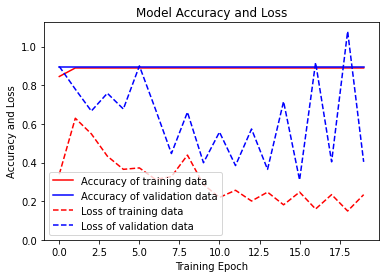

In [78]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

5/5 [==============================] - 0s 2ms/step
[[3.40465933e-01 6.59534156e-01]
 [3.38238299e-01 6.61761701e-01]
 [3.41445208e-01 6.58554792e-01]
 [3.40867490e-01 6.59132481e-01]
 [3.41799110e-01 6.58200920e-01]
 [3.39404523e-01 6.60595536e-01]
 [3.36183548e-01 6.63816452e-01]
 [3.17073353e-02 9.68292654e-01]
 [3.74863632e-02 9.62513685e-01]
 [1.04094148e-02 9.89590585e-01]
 [6.96218340e-03 9.93037879e-01]
 [8.19011405e-03 9.91809905e-01]
 [7.60216685e-03 9.92397845e-01]
 [4.09803353e-03 9.95902002e-01]
 [1.12128118e-02 9.88787115e-01]
 [8.50047730e-03 9.91499484e-01]
 [9.66846384e-03 9.90331531e-01]
 [2.18096669e-04 9.99781907e-01]
 [7.25400412e-07 9.99999285e-01]
 [4.71696012e-06 9.99995232e-01]
 [7.15745991e-05 9.99928474e-01]
 [1.20888308e-06 9.99998808e-01]
 [5.36441974e-07 9.99999404e-01]
 [9.92077730e-07 9.99999046e-01]
 [1.10578170e-04 9.99889374e-01]
 [2.44233217e-02 9.75576639e-01]
 [2.85134673e-01 7.14865327e-01]
 [2.85940737e-01 7.14059234e-01]
 [1.99785130e-03 9.980021

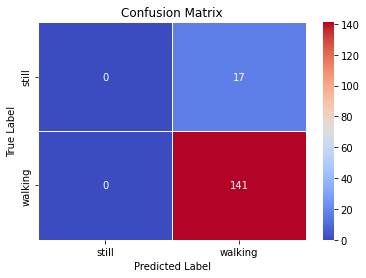

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.89      1.00      0.94       141

    accuracy                           0.89       158
   macro avg       0.45      0.50      0.47       158
weighted avg       0.80      0.89      0.84       158



c:\Users\Kevin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Kevin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Kevin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [80]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
def show_confusion_matrix(validations, predictions):

    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=['still', 'walking'],
                yticklabels=['still', 'walking'],
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model.predict(X_test)
# Take the class with the highest probability from the test predictions
print(y_pred_test)
max_y_pred_test = np.argmax(y_pred_test, axis=1)
print(max_y_pred_test)

max_y_test = np.argmax(encoded_y_test, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

In [59]:
model.evaluate(X_test, encoded_y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.2873 - accuracy: 0.8924


[0.2873266339302063, 0.892405092716217]

In [49]:
data_df = pd.read_csv('datasets/walking_19_02_2023_17_21_28.csv')

data_input = []

for i in range(0, data_df.shape[0], 10):
    data_input.append(data_df.iloc[i:(i+10), :])

model.predict(np.array(data_input))

3/3 [==============================] - 0s 3ms/step


array([[9.99305487e-01, 6.94551680e-04],
       [1.25595257e-01, 8.74404728e-01],
       [9.97912705e-01, 2.08733650e-03],
       [9.99901533e-01, 9.85153602e-05],
       [6.42138004e-01, 3.57861996e-01],
       [1.73675135e-01, 8.26324880e-01],
       [9.45668161e-01, 5.43318577e-02],
       [6.29105885e-03, 9.93708968e-01],
       [9.98562753e-01, 1.43726601e-03],
       [4.69407649e-04, 9.99530554e-01],
       [9.65309262e-01, 3.46907116e-02],
       [9.14112151e-01, 8.58878568e-02],
       [9.99804199e-01, 1.95844375e-04],
       [3.61186527e-02, 9.63881314e-01],
       [3.41451541e-02, 9.65854883e-01],
       [8.86072516e-01, 1.13927484e-01],
       [1.04587283e-02, 9.89541352e-01],
       [9.99935865e-01, 6.40730141e-05],
       [8.92691314e-01, 1.07308663e-01],
       [8.95949662e-01, 1.04050413e-01],
       [9.99327421e-01, 6.72619790e-04],
       [5.46784997e-01, 4.53214943e-01],
       [9.94593799e-01, 5.40625444e-03],
       [9.92504835e-01, 7.49518489e-03],
       [9.916380